In [75]:
! jupyter nbconvert --to script DataUnderstandingCleaning.ipynb

[NbConvertApp] Converting notebook DataUnderstandingCleaning.ipynb to script
[NbConvertApp] Writing 37440 bytes to DataUnderstandingCleaning.py


In [1]:
import pandas as pd
import sqlite3
import sys
sys.path.append(r'C:\Users\jakeb\Downloads\INTEX_455')
import functions as fun


conn = sqlite3.connect('Movies.db')

titles = pd.read_sql_query('select * from movies_titles', conn)
users = pd.read_sql_query('select * from movies_users', conn)
ratings = pd.read_sql_query('select * from movies_ratings', conn)

In [2]:
def quick_vis(df, col):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.histplot(data=df, x=df[col])
    plt.xticks(rotation=90)  # Rotate x-axis labels 90

<h1>Data Understanding</h1>

<h2>Titles</h2>

In [3]:
#See data
titles.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,description,...,Language TV Shows,Musicals,Nature TV,Reality TV,Spirituality,TV Action,TV Comedies,TV Dramas,Talk Shows TV Comedies,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...",United States,2020,PG-13,90 min,As her father nears the end of his life filmma...,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,None,Ama Qamata Khosi Ngema Gail Mabalane Thabang M...,South Africa,2021,TV-MA,2 Seasons,After crossing paths at a party a Cape Town te...,...,0,0,0,0,0,0,0,1,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabiha ...,None,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,...,0,0,0,0,0,1,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,None,None,None,2021,TV-MA,1 Season,Feuds flirtations and toilet talk go down amon...,...,0,0,0,1,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,None,Mayur More Jitendra Kumar Ranjan Raj Alam Khan...,India,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,...,0,0,0,0,0,0,1,0,0,0


In [4]:
#Basic familiarity with data
print(f'{titles.shape}\n')
print(titles.dtypes)

(8508, 42)

show_id                                               object
type                                                  object
title                                                 object
director                                              object
cast                                                  object
country                                               object
release_year                                           int64
rating                                                object
duration                                              object
description                                           object
Action                                                 int64
Adventure                                              int64
Anime Series International TV Shows                    int64
British TV Shows Docuseries International TV Shows     int64
Children                                               int64
Comedies                                               int64
Comedies Dra

In [5]:
#Univariate stats
#Check how the data is structured, inconsistencies, missing values etc. 
uni_stats_df = fun.univariate_stats(titles)
uni_stats_df

,dtype,count,missing,unique,mode,min,q1,median,q3,max,mean,std,skew,kurt
show_id,object,8508,0,8508,s1,-,-,-,-,-,-,-,-,-
type,object,8508,0,2,Movie,-,-,-,-,-,-,-,-,-
title,object,8508,0,8505,15-Aug,-,-,-,-,-,-,-,-,-
director,object,6394,2114,4703,Rajiv Chilaka,-,-,-,-,-,-,-,-,-
cast,object,8389,119,8117,David Attenborough,-,-,-,-,-,-,-,-,-
country,object,7694,814,731,United States,-,-,-,-,-,-,-,-,-
release_year,int64,8508,0,74,2018,1925,2013.0,2017.0,2019.0,2021,2014.18606,8.836541,-3.465986,16.405851
rating,object,8504,4,14,TV-MA,-,-,-,-,-,-,-,-,-
duration,object,8507,1,220,1 Season,-,-,-,-,-,-,-,-,-
description,object,8508,0,8476,Paranormal activity at a lush abandoned proper...,-,-,-,-,-,-,-,-,-


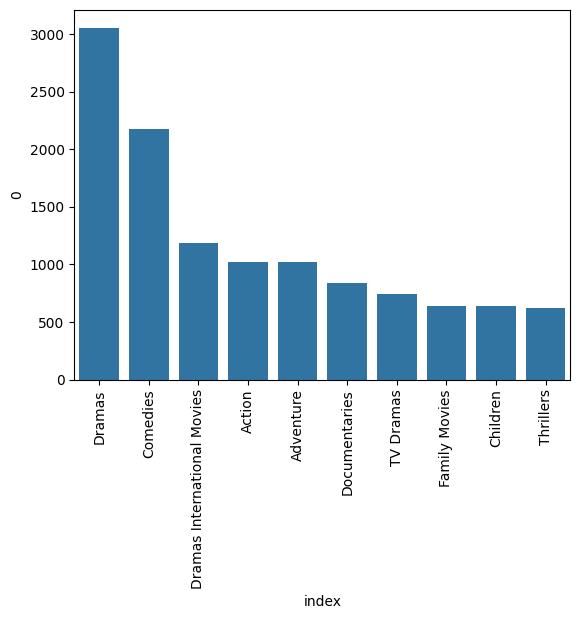

In [6]:
#function to show amount based on the main measure (genre in this scenario)
#allows range to change based on howmany input
def pop_cat(df, howMany = 10):
    dfUni = fun.univariate_stats(df)
    genres = [val for val in dfUni.index if val[0].isupper()]
    counts = df[genres]
    visDF = pd.DataFrame([counts.sum()], columns=genres)
    visDF = visDF.T.reset_index()
    visDF.sort_values(by=0, ascending=False, inplace=True)
    visDF = visDF.head(howMany)

    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.barplot(data=visDF, x=visDF['index'], y=visDF[0])
    plt.xticks(rotation=90)  # Rotate x-axis labels 90

pop_cat(titles)

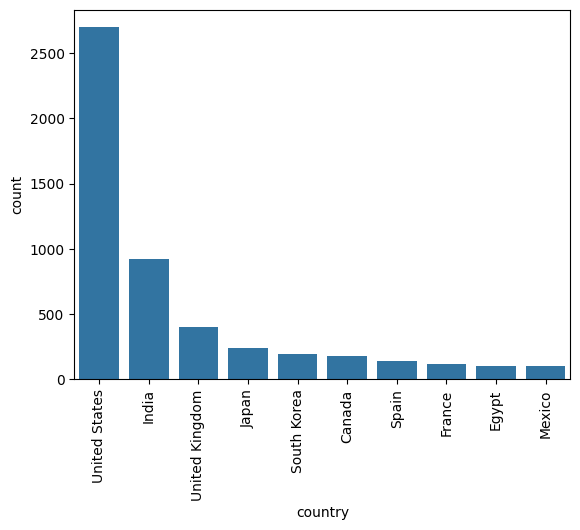

In [7]:
#Find top 10 country spread
import seaborn as sns
import matplotlib.pyplot as plt
countries = titles['country'].value_counts().iloc[:10].reset_index()
sns.barplot(data=countries,x='country', y='count' )
plt.xticks(rotation=90);


<h3>Titles Insights

There is a good variety of genres but a much heavier weight of dramas than the rest<br>
Skewness and kurtosis are crazy for the genres so I will probably have to avoid models where that is a factor<br>
Around a quarter of all directors are missing, this column may have to be dropped<br>
The movie country of origin is heavily weighted to america, this is probably because most big ticket movies are from california, will want to be aware of this

<h2>Users</h2>

In [8]:
#See the data
users.head(5)

,user_id,name,phone,email,age,gender,Netflix,Amazon Prime,Disney+,Paramount+,Max,Hulu,Apple TV+,Peacock,city,state,zip
0,1,Stephen Peters,890.309.2971,esmith@hotmail.com,18,Male,0,0,0,1,0,1,1,0,New John,CT,53771
1,2,Vicki Thomas,399.837.0996,callahanmichael@gmail.com,51,Female,0,0,1,0,0,0,1,1,Lake Robert,TN,71689
2,3,Jesse Bright,(268)691-6431,acline@shelton.biz,30,Female,0,0,0,1,0,0,0,1,East Tinaside,ME,40660
3,4,Mark Hernandez,+1-473-252-5923x513,deborah33@yahoo.com,22,Male,0,1,1,0,1,0,1,1,Bowenchester,VA,17039
4,5,Cynthia Armstrong,001-015-883-2813x8196,amycastillo@larsen.com,40,Female,1,0,1,1,1,0,1,0,North Thomasland,GA,77006


In [9]:
#Basic exploration
print(f'{users.shape}\n')
print(users.dtypes)

(200, 17)

user_id          int64
name            object
phone           object
email           object
age              int64
gender          object
Netflix          int64
Amazon Prime     int64
Disney+          int64
Paramount+       int64
Max              int64
Hulu             int64
Apple TV+        int64
Peacock          int64
city            object
state           object
zip              int64
dtype: object


In [10]:
#Univariate stats
#Check how the data is structured, inconsistencies, missing values etc. 
fun.univariate_stats(users)

,dtype,count,missing,unique,mode,min,q1,median,q3,max,mean,std,skew,kurt
user_id,int64,200,0,200,1,1,50.75,100.5,150.25,200,100.5,57.879185,0.0,-1.2
name,object,200,0,199,Mark Hernandez,-,-,-,-,-,-,-,-,-
phone,object,200,0,200,(004)451-9883x852,-,-,-,-,-,-,-,-,-
email,object,200,0,200,aaronvega@yahoo.com,-,-,-,-,-,-,-,-,-
age,int64,200,0,47,30,18,30.0,42.0,53.0,65,41.61,13.541965,-0.034078,-1.143264
gender,object,200,0,3,Female,-,-,-,-,-,-,-,-,-
Netflix,int64,200,0,2,0,0,0.0,0.0,1.0,1,0.475,0.500628,0.100883,-2.010024
Amazon Prime,int64,200,0,2,0,0,0.0,0.0,1.0,1,0.495,0.50123,0.020152,-2.019894
Disney+,int64,200,0,2,0,0,0.0,0.0,1.0,1,0.48,0.500854,0.08067,-2.013731
Paramount+,int64,200,0,2,0,0,0.0,0.0,1.0,1,0.45,0.498742,0.20253,-1.978872


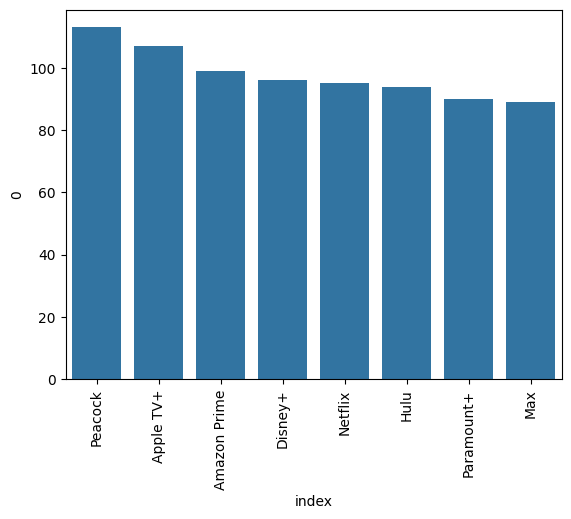

In [11]:
#call the previously created pop_genre to find popular streaming sites
pop_cat(users, howMany=15)

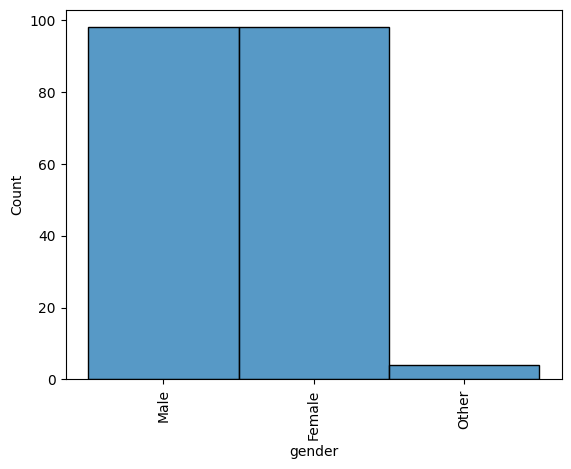

In [12]:
#Find the gender balance
quick_vis(users, 'gender')

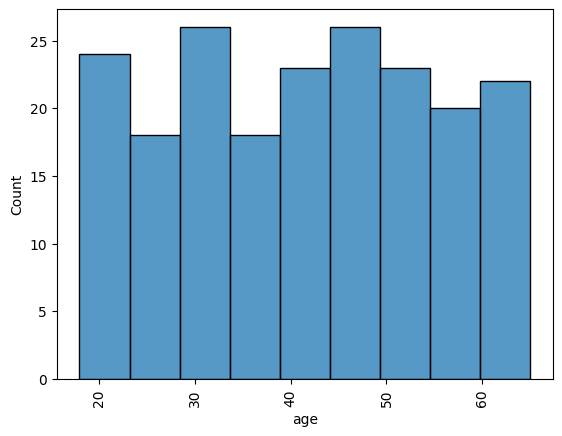

In [13]:
#find the age distribution
quick_vis(users, 'age')

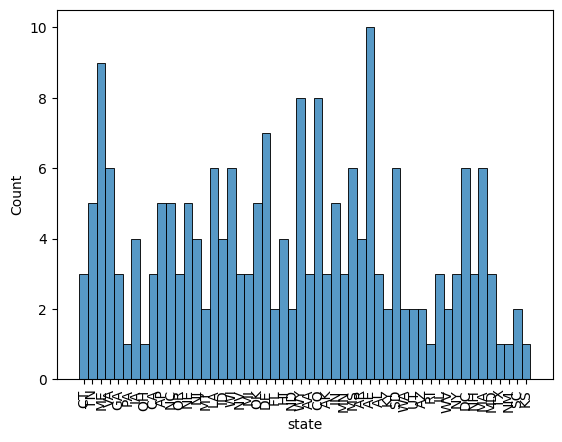

In [14]:
#state distribution
quick_vis(users, 'state')

#this graph shows its distributed across the country so there shouldn't be any major state bias. 

<h3>Users Insights</h3>

The data doesn't seem skewed in any one direction, the users are split more or less equally between streaming service, states, age and gender<br>
The data also seems fairly clean besides phone number, that formatting is messy. I doubt I will use it in my models so I'm not worried about it<br>
The kurtosis is higher than I'd like but I don't expect to use a model where that is a factor, and the skewness is very reasonable<br>
There is an "other" gender type, too little data to do anything with, I may drop this

<h2>Ratings</h2>

In [15]:
#See the data
ratings.head()

,user_id,show_id,rating
0,1,s8381,4
1,1,s3466,5
2,1,s3181,4
3,1,s294,3
4,1,s7739,5


In [16]:
#Basic Exploration
print(f'{ratings.shape}\n')
print(ratings.dtypes)

(2147, 3)

user_id     int64
show_id    object
rating      int64
dtype: object


In [17]:
#univarite overview
fun.univariate_stats(ratings)

,dtype,count,missing,unique,mode,min,q1,median,q3,max,mean,std,skew,kurt
user_id,int64,2147,0,200,1,1,51.0,101.0,151.0,200,100.693526,57.759328,-0.008979,-1.19873
show_id,object,2147,0,1809,s2179,-,-,-,-,-,-,-,-,-
rating,int64,2147,0,3,4,3,3.0,4.0,5.0,5,3.982767,0.808956,0.03138,-1.47118


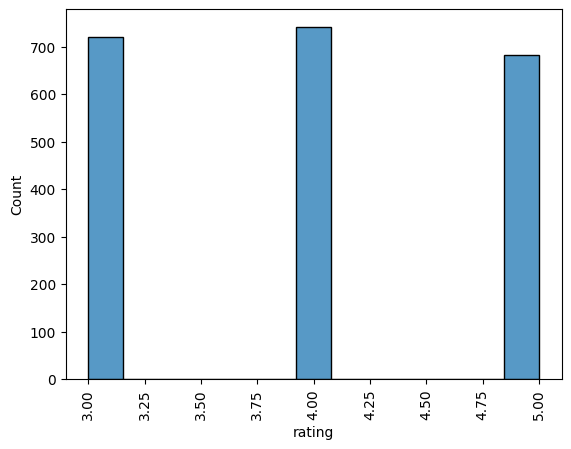

In [18]:
#Rating distribution

quick_vis(ratings, 'rating')

<h3>Ratings Insights</h3>

The minimum rating is 3 and the maximum is 5<br>
This shows that people are unlikely to rate a movie badly<br>
The movie ratings are equally distributed between 3, 4, and 5<br>
I may have to treat 3 as a "bad" rating since since it seems people are cautious about rating movies below 3

<h1>Data Preparation (Content Filtering)</h1>

This will accept a movie (show_id) and then recommend movies most similar.<br>
This will require only the titles data

In [19]:
#Keep only the columns I want
cols_wanted = [genre for genre in titles if genre[0].isupper()]
cols_wanted.insert(0,'show_id')
cols_wanted.insert(1,'description')
cols_wanted.insert(2,'title')

content = titles[cols_wanted]

In [20]:
#Drop blank rows
content.dropna(inplace=True)

C:\Users\jakeb\AppData\Local\Temp\ipykernel_30808\3532319360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content.dropna(inplace=True)


In [21]:
#this defines and runs the clean text function. 
#cleans the description to conver to lower case, removes punctuation and numbers (regex)
#turns it into a list and filters out filler words then converts words to their root

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords');

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

content['description'] = content['description'].apply(clean_text);

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jakeb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\jakeb\AppData\Local\Temp\ipykernel_30808\179748156.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['description'] = content['description'].apply(clean_text);


In [22]:
#get just the genre columns to include in genre content similarity matrix
df_genres = content[[col for col in content.columns if col[0].isupper()]]


<h1>Modeling (Content Filtering)

In [23]:
#Computes the vectors of the words in the descriptions

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(content['description'])


In [24]:
#computes the cosine similarity between the matrix
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tfidf_matrix)


In [25]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
#calculates teh similarity matrix for the genres, (puts it into a dataframe just for viewing ease)
genre_similarity_matrix = cosine_similarity(df_genres)
genre_similarity = pd.DataFrame(genre_similarity_matrix, index=content['show_id'], columns=content['show_id'])

In [26]:
#I chose to weight genre at 30 adn description at 70
#This is the descriptions were elaborate and very consistent so they provided a lot of meaning
#wheras picking a genre could have some leeway too it. 
combined_similarity = (0.3 * genre_similarity_matrix) + (0.7 * similarity_matrix)


In [30]:
#Function that pulls the recommendation. 
#matches teh show id to the df index and then pulls that index from the similarity matrix
#The similarity scores are then sorted and the top 5 (excluding the movie itself) are pulled
#The indexes are then matched and their titles are pulled
def recommend_movies(show_id, df, similarity_matrix, top_n=5):
    idx = df[df['show_id'] == show_id].index[0]
    
    sim_scores = list(enumerate(similarity_matrix[idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    
    movie_indices = [i[0] for i in sim_scores]
    
    return df.iloc[movie_indices]['show_id']

recommend_movies('s99', content, combined_similarity)


1983    s2048
4578    s4718
1569    s1619
8085    s8374
7795    s8071
Name: show_id, dtype: object

In [28]:
content[content['show_id'] == 's99']['title']

96    Octonauts: Above & Beyond
Name: title, dtype: object

In [31]:
ratings

,user_id,show_id,rating
0,1,s8381,4
1,1,s3466,5
2,1,s3181,4
3,1,s294,3
4,1,s7739,5
...,...,...,...
2142,200,s7536,3
2143,200,s4172,3
2144,200,s8300,3
2145,200,s2978,5


<h1>Evaluation (Content Filtering)

In [ ]:
#This function builds the ground truth by including a dict of shows that users liked after watching a particular show

def build_ground_truth(ratings_df, min_rating=4, max_per_show=10, min_users_per_show=2, min_relevant_items=2):
    from collections import defaultdict

    # Count how many users liked each show
    liked_df = ratings_df[ratings_df['rating'] >= min_rating]
    show_like_counts = liked_df['show_id'].value_counts()

    # Only keep shows liked by at least min_users_per_show users
    valid_shows = set(show_like_counts[show_like_counts >= min_users_per_show].index)

    # Build ground truth
    ground_truth = defaultdict(list)

    for user in liked_df['user_id'].unique():
        liked_shows = liked_df[liked_df['user_id'] == user]['show_id'].tolist()

        # Keep only valid shows
        liked_shows = [s for s in liked_shows if s in valid_shows]

        for show in liked_shows:
            related = [s for s in liked_shows if s != show]
            ground_truth[show].extend(related)

    # Deduplicate and filter based on number of relevant items
    filtered_ground_truth = {}

    for show, related in ground_truth.items():
        unique_related = list(set(related))
        if len(unique_related) >= min_relevant_items:
            filtered_ground_truth[show] = unique_related[:max_per_show]

    return filtered_ground_truth


In [40]:
#get the ground truth
ground_truth = build_ground_truth(ratings)

In [48]:
#Get precision and recall

def precision_recall_at_k(recommended, relevant, k=5):
    recommended_k = recommended[:k]
    recommended_set = set(recommended_k)
    relevant_set = set(relevant)
    
    true_positives = recommended_set & relevant_set

    precision = len(true_positives) / k
    recall = len(true_positives) / len(relevant) if relevant else 0

    return precision, recall


In [49]:
total_precision = 0
total_recall = 0
count = 0


#For this test we calculate the precision and reacall for all items in the ground truth
#
for show_id, relevant_ids in ground_truth.items():
    recommended_ids = recommend_movies(show_id, content, combined_similarity, top_n=5)
    
    precision, recall = precision_recall_at_k(recommended_ids, relevant_ids, k=5)
    
    #print(f"{show_id} — Precision: {precision:.2f}, Recall: {recall:.2f}")
    
    total_precision += precision
    total_recall += recall
    count += 1

average_precision = total_precision / count
average_recall = total_recall / count

print(f"\nAverage Precision@5: {average_precision:.2f}")
print(f"Average Recall@5: {average_recall:.2f}")



Average Precision@5: 0.01
Average Recall@5: 0.01


The precision and recall here are bad, however when I run actual movies in the next few cell blocks they relate well
This tells me a couple of things, one that the data is too sparse to really run a good metric here, I show 2000 total ratings with 1800 unique shows rated, there are not many overlapping ratings
Two is that my content filtering model runs based off genre and description similarity, where I am evaluating it based of user action of ratings. Since the measurement isn't measuring what my model
is actually doing it shows simply that user rating action doesn't necessarily depend too much on the similarity of movies.

Despite the low numerical metrics, qualitative results indicate the model is capturing meaningful content relationships, and could perform well with richer or more aligned user data.

In [29]:
#to stop cell blocks from being run when rerunning the whole notebook
raise KeyboardInterrupt

KeyboardInterrupt: 

To evaluate our content filtering model we decided to pull 3 movies and show the results<br>
Since this model doesn't have concrete stats such as precision or accuracy, we had to judge our model based off our perception of the movie

In [ ]:
angry_birds_id = content[content['title'] == 'Angry Birds']['show_id'].iloc[0]
recommend_movies(angry_birds_id,content,similarity_matrix )

7909    The Angry Birds Movie 2
1131             Pui Pui Molcar
3293     Dancing with the Birds
6268              Chuck Chicken
2149     The Larva Island Movie
Name: title, dtype: object

We were on par with Angry Birds but the tilt was towards birds movies rather than cartoony, video game movies.<br>
to fix this we will need to add more genre to the recommender

In [ ]:
squid_game_id = content[content['title'] == 'Squid Game']['show_id'].iloc[0]
recommend_movies(squid_game_id,content,similarity_matrix )

976                                 Free to Play
224                             Wheel of Fortune
6830                               Inconceivable
2797    Pokémon: Mewtwo Strikes Back - Evolution
5262                                    28 Moons
Name: title, dtype: object

This one was excellent, it recommended game shows and more nerdy movies which should fit in well with squid games audience

In [ ]:
jaws_id = content[content['title'] == 'Jaws']['show_id'].iloc[0]
recommend_movies(jaws_id,content,similarity_matrix )

41                 Jaws 2
43      Jaws: The Revenge
5397          Cheer Squad
42                 Jaws 3
322         Deep Blue Sea
Name: title, dtype: object

This showed our model was able to draw strong correlation between franchises, correctly recommending jaws 2 and 3<br>
We should add some filtering that if Jaws 2 is watched Jaws 1 isn't re-recommended

<h1>Deployment (Content Filtering)

In [ ]:
import joblib
joblib.dump(combined_similarity, 'ContentCombinedSimilarity.sav')



['ContentCombinedSimilarity.sav']

This was deployed through a flask application. 

In [ ]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('../Movies.db')
titles = pd.read_sql_query('select * from movies_titles', conn)
cols_wanted = [genre for genre in titles if genre[0].isupper()]
cols_wanted.insert(0,'show_id')
cols_wanted.insert(1,'description')
cols_wanted.insert(2,'title')
content = titles[cols_wanted]

import joblib
sim_matrix = joblib.load('similarity_matrix.sav')


def recommend_movies(show_id, df, similarity_matrix, top_n=5):
    idx = df[df['show_id'] == show_id].index[0]
    
    sim_scores = list(enumerate(similarity_matrix[idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    
    movie_indices = [i[0] for i in sim_scores]
    
    return df.iloc[movie_indices]['title']




from flask import Flask, request, jsonify
from flask_cors import CORS  


app = Flask(__name__)
CORS(app)

@app.route('/recommend', methods=['GET'])
def recommend_content():
    show_id = request.args.get('show_id', type=str)
    num = request.args.get('num', type=int)
    

    if show_id not in content['show_id'].values:
        return jsonify({'error': 'Show not found'}), 404
    
    
    try:
        res = recommend_movies(show_id, content, sim_matrix, top_n=num).to_list()
        return jsonify({'recommendations': res})
    
    except Exception as e:
        return jsonify({'error': str(e)}), 500


if __name__ == '__main__':
    app.run(debug=False)

<h1>Data Preparation (Collaboration)

In [ ]:
#check dtypes of dataframe and correct

for col in ratings:
    try:
        ratings[col].astype(int)
    except:
        ratings[col].astype('object')

ratings.dtypes

user_id     int64
show_id    object
rating      int64
dtype: object

In [ ]:
#remove rows with missing data

ratings.dropna(inplace=True)

ratings.isna().sum()

user_id    0
show_id    0
rating     0
dtype: int64

In [ ]:
#make sure ratings are within valid range

ratings = ratings[(ratings['rating'] >= 1) & (ratings['rating'] <= 5)]

In [ ]:
#eliminate users who haven't rated more than 2 movies
user_counts = ratings['user_id'].value_counts()
ratings = ratings[ratings['user_id'].isin(user_counts[user_counts >= 2].index)]

In [ ]:
#Eliminiate ratings where one user has rated the same show twice 
ratings.drop_duplicates(subset=['user_id', 'show_id'], inplace=True)


<h1>Modeling and Evaluation (Collaboration) --Injecting Dummy Data

This model was originally attempted with just the data given. We quickly realized that from 2000 ratings 1800 were of unique movies creating nearly no overlap on which to create similarities between users.
To get around this issue we downloaded a dataset off kaggle called 'big_ratings' and injected the data into the original ratings. Although we attempted to create a system to inject them ultimately the data 
was more or less randomly inserted and this created a lot of model noise and destroyed the patterns in the data. However this model is still valid and would provide good results if we had more valid data. 

In [ ]:
#This was our process of combining the "dummy data" to the legitimate data

import random
big_ratings = pd.read_csv('big_ratings.csv')

# Get real user_ids (1–200) and show_ids from your actual DB
real_user_ids = list(range(1, 201))
real_show_ids = list(content['show_id'].unique())

# Map fake userIds to real user_ids (1:1) using a random selector
#This allows for the users to be combined with just one other user and not to have their 
#results scattered all around. 
fake_users = big_ratings['userId'].unique()
user_map = {uid: random.choice(real_user_ids) for uid in fake_users}
big_ratings['user_id'] = big_ratings['userId'].map(user_map)

# Map fake movieIds to real show_ids 
#This is similar to the previous step, mapping groups of movies to real movies. 
fake_movies = big_ratings['movieId'].unique()
movie_map = {mid: random.choice(real_show_ids) for mid in fake_movies}
big_ratings['show_id'] = big_ratings['movieId'].map(movie_map)





In [ ]:
#Grab the necessary columns concat, and assign both databases to ratings
big_ratings = big_ratings[['user_id', 'show_id', 'rating']]
ratings = pd.concat([ratings, big_ratings])


#this removes shows that are rated twice by teh same person
ratings = ratings.drop_duplicates(subset=['user_id', 'show_id'], keep='first')

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

#sort ratings to make it easier to look at
ratings = ratings.sort_values(by=['user_id','show_id'])

#Turn all ratings into a pivot table sho we can see all ratings by all users
ratings_matrix = ratings.pivot_table(index='user_id', columns='show_id', values='rating').fillna(0)


In [ ]:
#Include user features to try and get cosine similarity ratings here
#This was our attempt to create as much similarity with real data as we could
user_features = users.set_index('user_id')[['age', 'gender', 'Netflix',	'Amazon Prime', 'Disney+',	'Paramount+', 'Max', 'Hulu','Apple TV+','Peacock','state']]
user_features = pd.get_dummies(user_features, drop_first=True, dtype=int)

In [ ]:
#Scale and put the similarity ratings into a db so that age doesn't skew results
#We then calculate similarity between users and put it into a db
#This is only user features such as gender, streaming service etc. 
scaled_features =StandardScaler().fit_transform(user_features)
user_feature_similarity = pd.DataFrame(
    cosine_similarity(scaled_features),
    index=user_features.index,
    columns=user_features.index
)

In [ ]:
#Find the maximum similarity rating based off user features
#I wanted to do this to give me a good idea of the overlap and how similar these people are
#As you can see with just our user features we got very high cosine similarities
max = 0
for col in user_feature_similarity:
    maximum = user_feature_similarity[col]
    maximum.loc[col] = 0
    if maximum.max() > max:
        max = maximum.max()
        print(col)
        print(max)

1
0.8453605209921409
2
0.9171173983553578
13
0.9458973321537769
25
0.9505911018787323
84
0.9522288375290903
94
0.9607252618555651


In [ ]:
#Generate the similarity matrix between users based off of their ratings and convert to a dataframe
#This is essentially the same as teh previous cell block except instead of grouping based off of characteristics
#it is based off ratings

user_similarity = cosine_similarity(ratings_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=ratings_matrix.index, columns=ratings_matrix.index)

In [ ]:
#combine the two similarity matrices with ratings having a .7 weight and user features .3
#I chose to weight ratings higher because although characteristics play a factor, ratings is directly what we're predicing so it is a much better predictor. 
for i in range(1,user_similarity_df.shape[0]+1):
    user_similarity_df[i] = (user_similarity_df[i]*.7)+ (user_feature_similarity[i]*.3)

In [ ]:
#find the new highest cosine similarity after combining the two. 
#As you can see our similarity betweem ratings is much lower here
max = 0
for i in range(1,201):
    sim_scores = user_similarity_df.loc[i].copy()
    sim_scores.loc[i] = 0
    if sim_scores.max() > max:
        max = sim_scores.max()
        print(i)
        print(sim_scores.max())


1
0.39348302163874993
2
0.4758573719432152
5
0.4889875172285063
8
0.5282190133815472
13
0.5440204070423378
17
0.5861638919238967


In [ ]:
def predict_ratings(user_id, ratings_matrix, similarity_df):
    #this pulls the similarity ratings of the specified user against all other users
    sim_scores = similarity_df.loc[user_id].copy()
    sim_scores.loc[user_id] = 0;
    #this pulls all ratings for all users and all shows
    user_ratings = ratings_matrix

    #this multiplies the matrix of the specified users simlarity to other users
    #by the ratins off all users 
    #This then uses the similarity of the specified user against all other users to calculate the weight other users ratings should be given
    #then the sum of all tehse ratings is taken and you're left with one list of calculated, weighted ratings
    weighted_ratings = sim_scores.values @ user_ratings.values

    #this then pulls all ratings that aren't 0 and mutiplies it by the matrix of the specified users ratings
    #this is saying, the more similar someone is to me, the higher weight their rating will receive in the prediction.
    #this is the average weight for each show. 
    sim_sums = sim_scores.values @ (user_ratings > 0).values

    #Now we divide the weighted ratings of each show over the weight given to each user (those more similar have a higher weight)
    #This will put us into the rante of 0-5 again. the 1e-8 is to prevent divide by 0
    predicted_ratings = weighted_ratings / (sim_sums + 1e-8)
    
    return pd.Series(predicted_ratings, index=user_ratings.columns)

In [ ]:
joblib.dump(user_similarity_df, 'CollabUserSimDF.sav')
joblib.dump(ratings_matrix, 'CollabRatingsMatrix.sav')

['CollabRatingsMatrix.sav']

In [ ]:
predictionSeries = predict_ratings(1, ratings_matrix=ratings_matrix, similarity_df=user_similarity_df)

In [ ]:
#These are our predicted ratings for each show
predictionSeries

show_id
s1       3.825226
s10      3.836248
s1001    3.516140
s1002    3.547796
s1003    4.037588
           ...   
s995     3.685641
s996     3.952437
s997     3.245897
s998     3.919301
s999     3.500000
Length: 7801, dtype: float64

<h3>Evaluation (Collaboration) --Injecting Dummy Data

In [ ]:
from sklearn.model_selection import train_test_split

#split the data
train_df, test_df = train_test_split(ratings, test_size=0.1, random_state=1)


In [ ]:
#Make a training matrix off the training data and a similarity matrix

train_matrix = train_df.pivot_table(index='user_id', columns='show_id', values='rating').fillna(0)
from sklearn.metrics.pairwise import cosine_similarity
similarity_df = pd.DataFrame(cosine_similarity(train_matrix), index=train_matrix.index, columns=train_matrix.index)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np


#This runs through each of the test data rows gets the predictions and pulls the actual ratings into 2 lists
actual = []
predicted = []

for row in test_df.itertuples():
    user = row.user_id
    show = row.show_id
    rating = row.rating
    
    # skip users not in training set
    if user not in train_matrix.index or show not in train_matrix.columns:
        continue
    
    pred_series = predict_ratings(user, train_matrix, similarity_df)
    pred_rating = pred_series.get(show, None)
    
    if pred_rating is not None:
        actual.append(rating)
        predicted.append(pred_rating)


In [ ]:
#Generate RMSE
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f"RMSE: {rmse:.4f}")


RMSE: 1.0048


<p>The RMSE is ok for this model, we're off by around 1 star on each rating
<p>This is alright to me. To make this model we had to generate dummy data for the majority of users just to come up with enough overlap in ratings.
<p>This destroys much of the normal data patterns making a lot of "noise" in the model so its hard to create a benchmark when the data is basically random. 

In [ ]:
from sklearn.metrics import mean_absolute_error
#Get MAE score
mae = mean_absolute_error(actual, predicted)
print(f'MAE {mae}')

MAE 0.7839312023046359


The MAE is pretty similar to RMSE, slightly better showing I probably have some outliers in the data

In [ ]:
#Function to generate precision and recall
def precision_recall_at_k(actual_ratings, predicted_ratings, threshold=3.5, K=20):
    
    #this combines the two actual adn predicted ratings together and sorts them based off predicted ratings
    rated = list(zip(actual_ratings, predicted_ratings))
    rated.sort(key=lambda x: x[1], reverse=True)  

    #this grabs teh top however many predictions you want to test your model on 
    top_k = rated[:K]

    #if the actual rating is above the threshold to be considered a like then a count of 1 is added to the list and the list is summed
    hits = sum(1 for actual, z in top_k if actual >= threshold)

    #precision is number of movies they liked over number we said they'd like
    precision = hits / len(top_k)
    #recall is number of movies they liked that we recommended
    #since there are so many movies and the data is already noisy it's very bad score here
    recall = hits / sum(1 for actual in actual_ratings if actual >= threshold)

    return precision, recall


In [ ]:
pres, rec = precision_recall_at_k(actual, predicted)

print(f'Precision: {pres}, Recall: {rec}')

Precision: 0.6, Recall: 0.0006033789219629927


In [ ]:
#This is the precision recall we'd expect if it was random
sum(1 for item in actual if item>3.5) / len(actual)

0.47856244053647606

The precision and recall scores are not great. Of the ones I recommended the user liked 60%, much better than guessing still not great. The recall was extremely bad. This is because the data wasn't "real" and so any patterns between movies and users were hidden in the noise. The precision shows that our model could still find some patterns but much less than we'd expect with real data. 

<h1>Modeling and Evaluation (Collaboration/Content Hybrid)

<p>Due to the lack of overlapping reviews data, we decided on a hybrid model that considers user data. 
<p>This model uses the content similarity but bases its recommendations off of the highest rated movies by that user 
<p>For example, if a user rates Interstellar 5/5 then we will use that rating to recommend titles similar to interstellar. 
<p>This allows us to get around the problem of sparse overlapping ratings and still provide personalized recommenations

In [51]:
#Create the tfidf matrix to find the similarities between movie descriptions
tfidf_matrix = tfidf.fit_transform(content['description'])

#Get the cosine similarity of each show
show_similarity = cosine_similarity(tfidf_matrix)

#make a ratings matrix for the ratings of each user against each show
ratings_matrix = ratings.pivot_table(index='user_id', columns='show_id', values='rating').fillna(0)


In [60]:
#function to generate predictions from our model. 
#The user_id is passed in and the top ratings for that user are grabbed
#if there are multiple 5 star ratings then one is randomly selected to generate the list this way the list can be refreshed by the user
#then using that selected contentid we generate recommendations similar to that movie. 
#If the user doens't have any high ratings then movies similar to our highest rated movies are selected so that the recommendations stay in one category
def predict_from_content_similarity(user_id, df,ratings_matrix, content_similarity, num=5):
    import random 
    user_ratings = ratings_matrix.loc[user_id].sort_values(ascending=False)[:5]

    if len(user_ratings[user_ratings>3])>0:
        rand = random.randint(1, len(user_ratings[user_ratings>3]))
        rand = rand-1
        selected_show = df[df['show_id'] == user_ratings.index[rand]]['show_id']
        titles = recommend_movies(user_ratings.index[rand], df, content_similarity,top_n=num)
    else:
        highest_ratings = {}
        for col in ratings_matrix:
            highest_ratings[col] = ratings_matrix[col].sum()
        highest_ratings = list(sorted(highest_ratings.items(), key=lambda x:x[1], reverse=True))[:5]
        highest = [item[0] for item in highest]

        rand = random.randint(0, len(highest)-1)
        titles = recommend_movies(highest[rand], df, content_similarity,top_n=num)

    return titles, selected_show


predictions, selected = predict_from_content_similarity(2, titles, ratings_matrix, combined_similarity)

In [53]:
predictions.sort_values(ascending=False)[:20]

855      s887
6903    s7140
3582    s3686
3482    s3583
1429    s1474
Name: show_id, dtype: object

In [61]:
selected

7579    s7845
Name: show_id, dtype: object

This model did well, it selected the secrets of scotland yard and then pulled a movie about london adn other documentaries

<h2>Evaluation (Collaboration/Content Hybrid)

In [ ]:
#We now get the ground truth or the movies that users have liked to have some benchmark to base this model on
#Similar to what we did for movies on the other content filtering model

def get_user_ground_truth(user_id, ratings_df, exclude_show_id=None, min_rating=4):
    user_rated = ratings_df[(ratings_df['user_id'] == user_id) & (ratings_df['rating'] >= min_rating)]
    if exclude_show_id is not None and not isinstance(exclude_show_id, pd.Series):
        user_rated = user_rated[user_rated['show_id'] != exclude_show_id]

    return user_rated['show_id'].tolist()


In [ ]:
#This iterates through each user and gets their movies they liked
# and tehn calculates the precision adn recall for the user
recall_total = 0
precision_total = 0
for user in range(1,200):
    predictions, selected = predict_from_content_similarity(user, titles, ratings_matrix, combined_similarity)
    recommended_ids = content[content['title'].isin(predictions)]['show_id'].tolist()
    relevant_ids = get_user_ground_truth(2, ratings, exclude_show_id=selected)

    precision, recall = precision_recall_at_k(recommended_ids, relevant_ids, k=5)

    precision_total += precision
    recall_total += recall

print(f'Average Precision {precision_total/200}, Average Recall {recall_total/200}')

Average Precision 0.0, Average Recall 0.0


Like in the last model the precision and recall are bad here. Similar to what we found in the previous content filtering model it is likely due 
to a variety of reasons like sparse data, the content filtering model is measuring similarity between titles not user action which is our measure. 
But we can see in the cell blocks below that the prediction do well in finding similar movies to each other

<p>Again for this model since it is not truly a content filtering model ie. we're not comparing users against other users just users against their previous choices
<p>we don't have any calculable metrics to compare. We can only compare off of how close we percieve the movies to be to each other

In [ ]:
#This is here to block these bottom code blocks from being run when running the whole file
#since teh recommndations are random my explanations won't make sense if they're run again
raise KeyboardInterrupt

KeyboardInterrupt: 

In [ ]:
predicted, selected = predict_from_content_similarity(2, titles, ratings_matrix, show_similarity)

print(f'Predicted\n {predicted.values}')
print(f'\nSelected {selected.iloc[0]}')

Predicted
 ['Tim Allen: ReWires America' 'Michelle Wolf: Joke Show'
 'Jim Gaffigan: Obsessed' 'Professor Mack' 'Gina Yashere: Skinny B*tch']

Selected Tim Allen: Men Are Pigs


This one selected well, based off the tim allen movie it recommended another tim allen movie and other comedian movies

In [ ]:
predicted, selected = predict_from_content_similarity(80, titles, ratings_matrix, show_similarity)

print(f'Predicted\n {predicted.values}')
print(f'\nSelected: {selected.iloc[0]}')

Predicted
 ['Ram Teri Ganga Maili' 'Düğün Dernek' 'Love You to the Stars and Back'
 'The Last Laugh' 'Strange Weather']

Selected: Power Paandi


This one was given an indian movie and the movies returned were also indian/ethnic movies. 

In [ ]:
predicted, selected = predict_from_content_similarity(65, titles, ratings_matrix, show_similarity)

print(f'Predicted\n {predicted.values}')
print(f'\nSelected: {selected.iloc[0]}')

Predicted
 ['Echcharikkai' 'Silent Hill: Revelation' 'Bitter Daisies'
 'Magi: The Labyrinth of Magic' 'Zoids Wild']

Selected: Outer Banks


This one also was accurate in matching outer banks to similar crime movies

<h1>Deploy (All Models)

We deployed our models as a flask app. This is the server code for what we used.

We uploaded our .sav files and then imported the functions we used to get our recommenadations then used the api params to pull predictions dyanmically based off of users or items

The functions are set up in a way that allows them to request how many predictions are pulled at a time

You can test our flask API at https://api.cineniche.click/

Here is an example of each endpoint, some return id's where others return titles dependant on application need. 
<ul>
  <li><a href="https://api.cineniche.click/recommend?show_id=s2&num=5">https://api.cineniche.click/recommend?show_id=s2&num=5</a> – Used on the <strong>"See Similar Movies"</strong> page</li>
  <li><a href="https://api.cineniche.click/user_ratings?user_id=90&num=90">https://api.cineniche.click/user_ratings?user_id=90&num=90</a> – Used on the main landing page, <strong>"Custom Recommendations for NAME"</strong></li>
  <li><a href="https://api.cineniche.click/recommend_user?user_id=1&num=50">https://api.cineniche.click/recommend_user?user_id=1&num=50</a> – Used on the main landing page, <strong>"Similar Users Also Liked"</strong></li>
</ul>


In [ ]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('Movies.db')
titles = pd.read_sql_query('select * from movies_titles', conn)
conn.close()
cols_wanted = [genre for genre in titles if genre[0].isupper()]
cols_wanted.insert(0,'show_id')
cols_wanted.insert(1,'description')
cols_wanted.insert(2,'title')

content = titles[cols_wanted]


# In[9]:


import joblib

sim_matrix = joblib.load('ContentCombinedSimilarity.sav')
ratings_matrix = joblib.load('CollabRatingsMatrix.sav')
users_similarity_df = joblib.load('CollabUserSimDF.sav')

def get_db():
    conn = sqlite3.connect('Movies.db')
    conn.row_factory = sqlite3.Row
    return conn

# In[10]:


def recommend_movies(show_id, df, similarity_matrix, top_n=5):
    idx = df[df['show_id'] == show_id].index[0]

    sim_scores = list(enumerate(similarity_matrix[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    movie_indices = [i[0] for i in sim_scores]

    return df.iloc[movie_indices]['title']



def predict_from_content_similarity(user_id, df,ratings_matrix, content_similarity, num=5):
    import random
    user_ratings = ratings_matrix.loc[user_id].sort_values(ascending=False)[:5]

    if len(user_ratings[user_ratings>3])>0:
        rand = random.randint(1, len(user_ratings[user_ratings>3]))
        rand = rand-1
        selected_show = df[df['show_id'] == user_ratings.index[rand]]['title']
        titles = recommend_movies(user_ratings.index[rand], df, content_similarity,top_n=num)
    else:
        highest_ratings = {}
        for col in ratings_matrix:
            highest_ratings[col] = ratings_matrix[col].sum()
        highest_ratings = list(sorted(highest_ratings.items(), key=lambda x:x[1], reverse=True))[:5]
        highest = [item[0] for item in highest]

        rand = random.randint(0, len(highest)-1)
        titles = recommend_movies(highest[rand], df, content_similarity,top_n=num)

    return titles

# In[16]:

def predict_ratings_user_collab(user_id, ratings_matrix, user_similarity_df):
    #this pulls the similarity ratings of the specified user against all other users
    sim_scores = user_similarity_df.loc[user_id].copy()
    sim_scores.loc[user_id] = 0;
    #this pulls all ratings for all users and all shows
    user_ratings = ratings_matrix

    #this multiplies the matrix of the specified users simlarity to other users
    #by the ratins off all users
    #This then uses the similarity of the specified user against all other users to calculate the weight other users ratings should be given
    #then the sum of all tehse ratings is taken and you're left with one list of calculated, weighted ratings
    weighted_ratings = sim_scores.values @ user_ratings.values

    #this then pulls all ratings that aren't 0 and mutiplies it by the matrix of the specified users ratings
    #this is saying, the more similar someone is to me, the higher weight their rating will receive in the prediction.
    #this is the average weight for each show.
    sim_sums = sim_scores.values @ (user_ratings > 0).values

    #Now we divide the weighted ratings of each show over the weight given to each user (those more similar have a higher weight)
    #This will put us into the rante of 0-5 again. the 1e-8 is to prevent divide by 0
    predicted_ratings = weighted_ratings / (sim_sums + 1e-8)

    return pd.Series(predicted_ratings, index=user_ratings.columns)


from flask import Flask, request, jsonify
from flask_cors import CORS  # Import CORS


app = Flask(__name__)
CORS(app)

@app.route('/recommend', methods=['GET'])
def recommend_content():
    show_id = request.args.get('show_id', type=str)
    num = request.args.get('num', type=int)

    if show_id not in content['show_id'].values:
        return jsonify({'error': 'User not found'}), 404


    try:
        res = recommend_movies(show_id, content, sim_matrix, top_n=num).to_list()
        return jsonify({'recommendations': res})

    except Exception as e:
        return jsonify({'error': str(e)}), 500


@app.route('/recommend_user', methods=['GET'])
def recommend_user():
    user_id = request.args.get('user_id', type=int)
    num = request.args.get('num', type=int)

    try:
        ratings_matrix.loc[user_id]
    except:
        return jsonify({'error': 'User not found'}), 404

    try:
        preds = predict_from_content_similarity(user_id, content,ratings_matrix, sim_matrix, num=num)
        mapping = content.set_index('title')['show_id'].to_dict()
        preds = preds.map(mapping)
        preds = preds.values.tolist()
        return jsonify({'results':preds})

    except Exception as e:
        return jsonify({'error': str(e)}), 500

@app.route('/user_ratings', methods=['GET'])
def recommend_user_ratings():
    user_id = request.args.get('user_id', type=int)
    num = request.args.get('num', type=int)

    try:
        ratings_matrix.loc[user_id]
    except:
        return jsonify({'error': 'User not found'}), 404

    try:
        preds = predict_ratings_user_collab(user_id, ratings_matrix, users_similarity_df)
        preds = preds.sort_values(ascending=False)
        preds = preds.index[:num].to_list()
        return jsonify({'results':preds})

    except Exception as e:
        return jsonify({'error': str(e)}), 500



@app.route('/query', methods=['POST'])
def query():
    sql = request.args.get('query')
    if not sql:
        return jsonify({'error': 'No query provided'}), 400

    try:
        conn = get_db()
        df = pd.read_sql_query(sql, conn)
        conn.close()
        return jsonify(df.to_dict(orient='records'))
    except Exception as e:
        return jsonify({'error': str(e)}), 400



@app.route('/execute', methods=['POST'])
def execute():
    sql = request.args.get('query')
    if not sql:
        return jsonify({'error': 'No query provided'}), 400

    try:
        conn = get_db()
        cur = conn.cursor()
        cur.execute(sql)
        conn.commit()
        conn.close()
        return jsonify({'message': 'Success'})
    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
   app.run(host='0.0.0.0', port=5000, debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.37.64.53:5000
Press CTRL+C to quit
